<a href="https://colab.research.google.com/github/ever-oli/MLby22/blob/main/HousingPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading California Housing dataset...
Dataset loaded: 20640 rows, 9 columns.

Analyzing linear correlations...


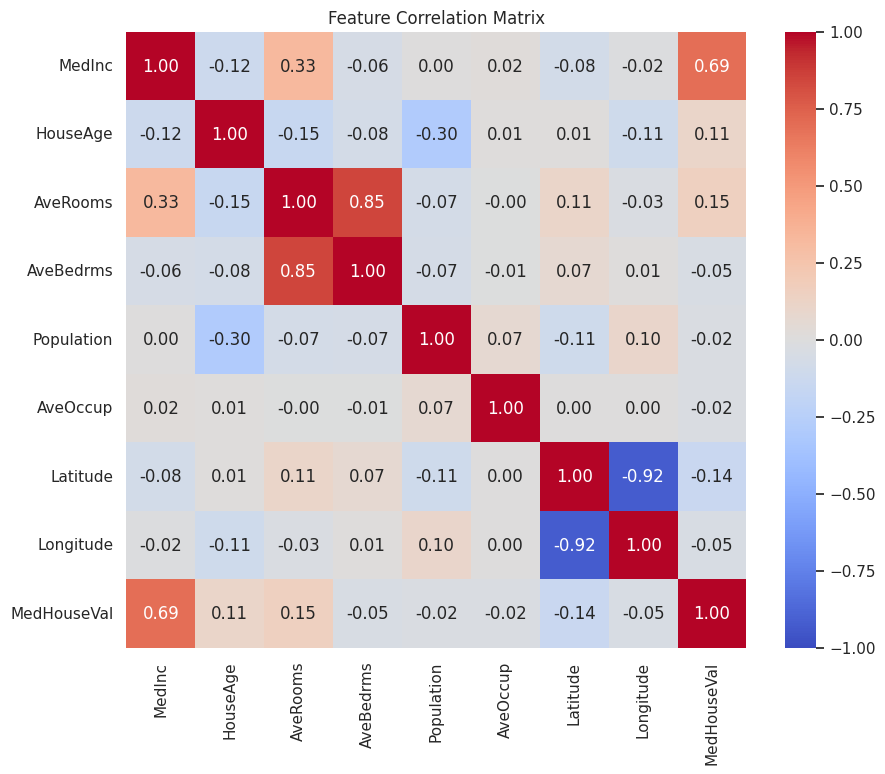


Training XGBoost Regressor...
----------------------------------------
MODEL PERFORMANCE:
Root Mean Squared Error (RMSE): 0.4815
R-squared (R2):                 0.8231
----------------------------------------

Generating Feature Importance plot...


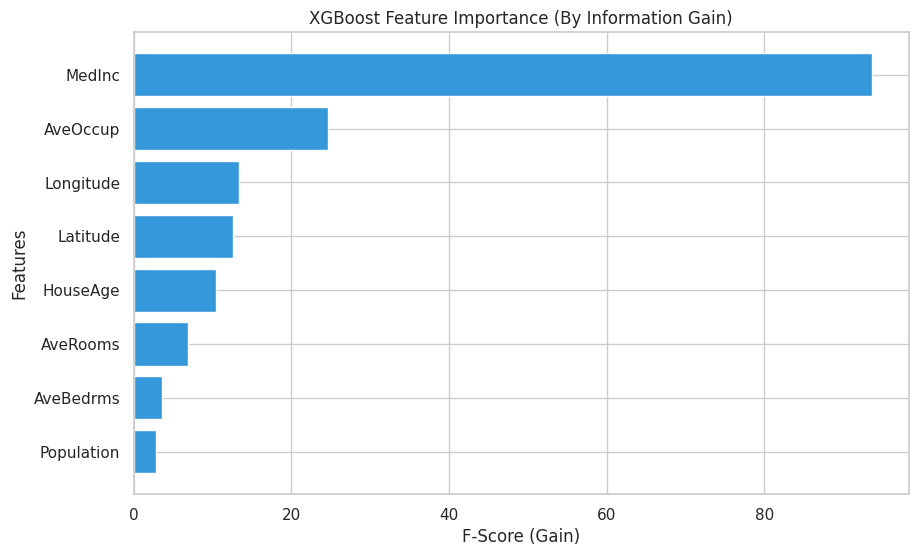


Analysis Complete. The top features shown in the chart drive the most predictive power.


In [1]:

# HOUSING PRICE REGRESSION & FEATURE SELECTION WITH XGBOOST

# Run this cell to install xgboost if it is not already in the environment:
# !pip install xgboost pandas matplotlib seaborn scikit-learn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set visualization style
sns.set_theme(style="whitegrid")


# 1. Data Loading and Initial Exploration

print("Loading California Housing dataset...")
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # Median house value in $100,000s

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns.\n")


# 2. Pre-Modeling Feature Selection (Correlation Matrix)

print("Analyzing linear correlations...")
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
# We use a heatmap to quickly see which features linearly correlate with the target
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


# 3. Data Preprocessing

# Separate features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note: XGBoost does not require feature scaling (like StandardScaler),
# as decision trees partition data based on thresholds, not distances.


# 4. Model Training (XGBoost Regressor)

print("\nTraining XGBoost Regressor...")
# Initialize the model
# objective='reg:squarederror' is the standard loss function for regression
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit the model
xg_reg.fit(X_train, y_train)


# 5. Evaluation Metrics

y_pred = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-" * 40)
print("MODEL PERFORMANCE:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2):                 {r2:.4f}")
print("-" * 40 + "\n")


# 6. Feature Importance & Selection

print("Generating Feature Importance plot...")

# XGBoost calculates importance based on 'weight', 'gain', or 'cover'.
# 'Gain' is the most relevant for feature selection as it measures the relative
# contribution of the corresponding feature to the model.
importance_type = 'gain'
importances = xg_reg.get_booster().get_score(importance_type=importance_type)

# Convert to a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance (Gain)': list(importances.values())
}).sort_values(by='Importance (Gain)', ascending=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance (Gain)'], color='#3498db')
plt.xlabel('F-Score (Gain)')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance (By Information Gain)')
plt.show()

print("\nAnalysis Complete. The top features shown in the chart drive the most predictive power.")